In [425]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [426]:
data = pd.read_csv('/Users/home/Downloads/AirPassengers.csv')

In [427]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [428]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [429]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
#Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [430]:
data.describe(include='object').T

,count,unique,top,freq
Month,144,144,1949-01,1


In [431]:
data.shape

(144, 2)

In [432]:
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [433]:
data['Month']=pd.to_datetime(data['Month'])

In [434]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [435]:
data.columns=['month','passengers']

In [436]:
data.set_index('month', inplace=True)


In [437]:
data.head()

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [438]:
data.loc['1949-01-01',]

passengers    112
Name: 1949-01-01 00:00:00, dtype: int64

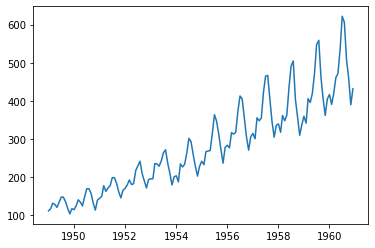

In [439]:
plt.plot(data['passengers'])
plt.show()

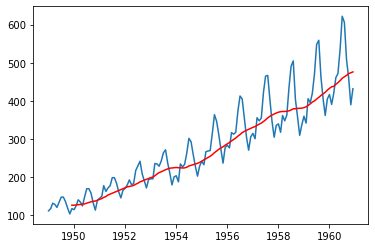

In [440]:
plt.plot(data['passengers'])
roll_mean=data['passengers'].rolling(12).mean()
plt.plot(roll_mean,color='r')
plt.show()

In [441]:
#vizualize the data

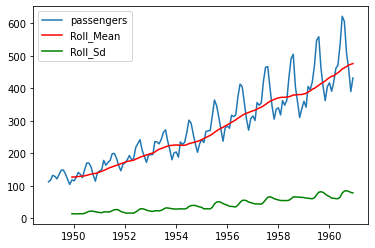

In [442]:
plt.plot(data['passengers'])
roll_mean=data['passengers'].rolling(12).mean()
plt.plot(roll_mean,color='r')
roll_sd=data['passengers'].rolling(12).std()
plt.plot(roll_sd,color='g')
plt.legend(['passengers','Roll_Mean','Roll_Sd'])
plt.show()

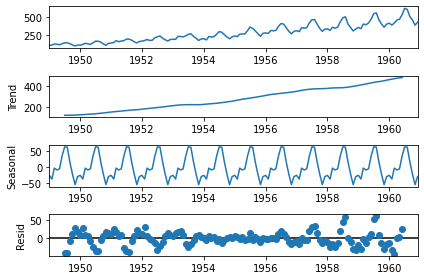

In [443]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(data,model='additive').plot()
plt.show()

# Test for stationary

In [444]:
from statsmodels.tsa.stattools import adfuller

In [445]:
#Ho : Data is stationary
#HA: Data is not stationary
def adfuller_test(passengers):
    result= adfuller(passengers)
    labels=['ADF Test Statistic','p Value','#Lags used','No of Obs']
    for value,lab in zip(result,labels):
        print(lab+':'+str(value))
    if result[1]<=0.05:
        print('Accept the Ha: Data is stationary')
    else:
        print('Accept the Ho: Data is not stationary')
       


In [446]:
adfuller_test(data['passengers'])    

ADF Test Statistic:0.8153688792060423
p Value:0.9918802434376409
#Lags used:13
No of Obs:130
Accept the Ho: Data is not stationary


In [447]:
data['passengers'].shift(1)

month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: passengers, Length: 144, dtype: float64

In [448]:
data['1st Diff']=data['passengers']- data['passengers'].shift(1)# normal 1st diff(periodic 1st diff)

In [449]:
data.head(10)

,passengers,1st Diff
month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
1949-07-01,148,13.0
1949-08-01,148,0.0
1949-09-01,136,-12.0


In [450]:
data['Seasonal 1st Diff']=data['passengers']- data['passengers'].shift(12)# normal 1st diff(periodic 1st diff)

In [451]:
data.head()

,passengers,1st Diff,Seasonal 1st Diff
month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [452]:
data.dtypes

passengers             int64
1st Diff             float64
Seasonal 1st Diff    float64
dtype: object

In [453]:
adfuller_test(data['1st Diff'].dropna())

ADF Test Statistic:-2.8292668241699874
p Value:0.05421329028382711
#Lags used:12
No of Obs:130
Accept the Ho: Data is not stationary


In [454]:
data['2nd Diff']=data['passengers']- data['passengers'].shift(2)# normal 1st diff(periodic 1st diff)

In [455]:
adfuller_test(data['2nd Diff'].dropna())

ADF Test Statistic:-2.9616951355554235
p Value:0.03862975767698849
#Lags used:11
No of Obs:130
Accept the Ha: Data is stationary


In [456]:
adfuller_test(data['Seasonal 1st Diff'].dropna())

ADF Test Statistic:-3.3830207264924805
p Value:0.011551493085514982
#Lags used:1
No of Obs:130
Accept the Ha: Data is stationary


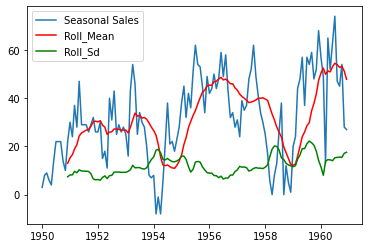

In [457]:
plt.plot(data['Seasonal 1st Diff'])
roll_mean=data['Seasonal 1st Diff'].dropna().rolling(12).mean()
plt.plot(roll_mean,color='r')
roll_sd=data['Seasonal 1st Diff'].dropna().rolling(12).std()
plt.plot(roll_sd,color='g')
plt.legend(['Seasonal Sales','Roll_Mean','Roll_Sd'])
plt.show()

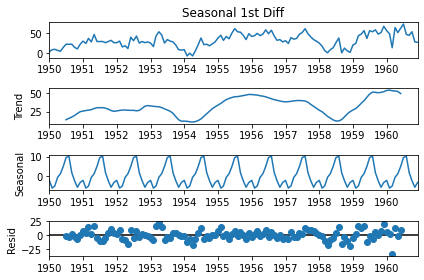

In [458]:
seasonal_decompose(data['Seasonal 1st Diff'].dropna(),model='additive').plot()
plt.show()

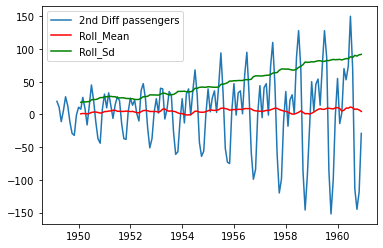

In [459]:
plt.plot(data['2nd Diff'])
roll_mean=data['2nd Diff'].dropna().rolling(12).mean()
plt.plot(roll_mean,color='r')
roll_sd=data['2nd Diff'].dropna().rolling(12).std()
plt.plot(roll_sd,color='g')
plt.legend(['2nd Diff passengers','Roll_Mean','Roll_Sd'])
plt.show()

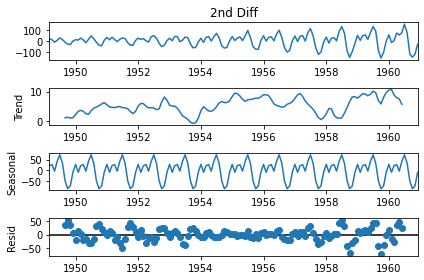

In [460]:
seasonal_decompose(data['2nd Diff'].dropna(),model='additive').plot()
plt.show()

# Time series Model

In [461]:
from pandas.plotting import autocorrelation_plot

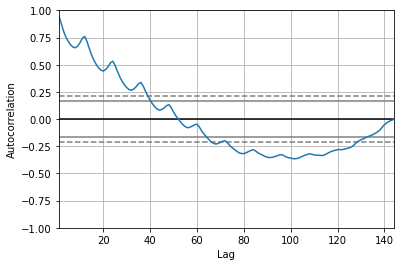

In [462]:
autocorrelation_plot(data['passengers'])
plt.show()

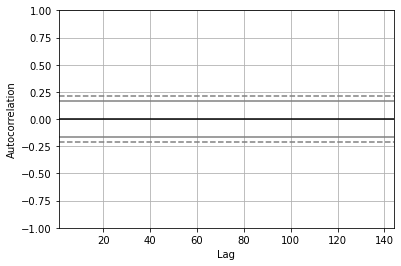

In [463]:
autocorrelation_plot(data['2nd Diff'])
plt.show()

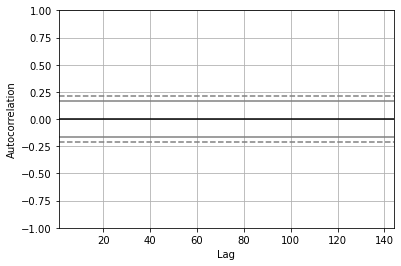

In [464]:
autocorrelation_plot(data['1st Diff'])
plt.show()

In [465]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

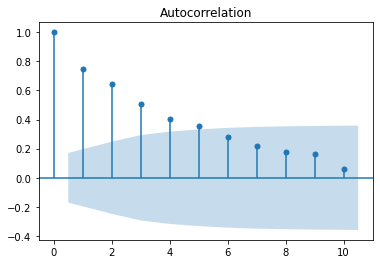

In [466]:
plot_acf(data['Seasonal 1st Diff'].dropna(), lags=10)
plt.show()

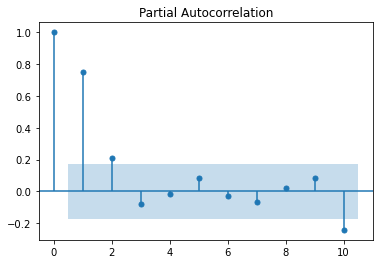

In [467]:
plot_pacf(data['Seasonal 1st Diff'].dropna(), lags=10)
plt.show()

In [468]:
#according to ACF and Pacf (p,q,d)=(2,2,5)

In [469]:
from pmdarima import auto_arima
a_arima = auto_arima(data['passengers'], start_p=0, start_q=0,d=2, test='adf', trace=True)
# Akaike information criterion

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1450.596, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1447.027, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1440.078, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=1437.879, Time=0.05 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=1419.706, Time=0.09 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=1420.109, Time=0.09 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=1421.692, Time=0.12 sec

Best model:  ARIMA(4,2,0)(0,0,0)[0]          
Total fit time: 1.085 seconds


In [470]:
from pmdarima import auto_arima
a_arima = auto_arima(data['passengers'], start_p=2, start_q=5,d=2, test='adf', trace=True)
#

Performing stepwise search to minimize aic
 ARIMA(2,2,5)(0,0,0)[0]             : AIC=inf, Time=0.78 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1450.596, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1447.027, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1440.078, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=1437.879, Time=0.07 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=1419.706, Time=0.07 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=1420.109, Time=0.09 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=1421.692, Time=0.11 sec

Best model:  ARIMA(4,2,0)(0,0,0)[0]          
Total fit time: 1.936 seconds


In [471]:
from pmdarima import auto_arima
a_arima = auto_arima(data['passengers'], start_p=0, start_q=0,d=2, test='adf', trace=True)
# Akaike information criterion

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1450.596, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1447.027, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1440.078, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=1437.879, Time=0.06 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=1419.706, Time=0.09 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=1420.109, Time=0.11 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=1421.692, Time=0.11 sec

Best model:  ARIMA(4,2,0)(0,0,0)[0]          
Total fit time: 1.129 seconds


In [472]:
a_arima

ARIMA(order=(4, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [473]:
from statsmodels.tsa.arima.model import ARIMA

In [474]:
model = ARIMA(data['passengers'], order=(2,2,5))

/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [475]:
model_fit = model.fit() # AIC: 1935.750 (0,1,0), AIC:1911.627 (1,1,1)

/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [476]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             passengers   No. Observations:                  144
Model:                 ARIMA(2, 2, 5)   Log Likelihood                -673.459
Date:                Tue, 21 Jun 2022   AIC                           1362.917
Time:                        16:31:22   BIC                           1386.564
Sample:                    01-01-1949   HQIC                          1372.526
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2764      0.099     -2.782      0.005      -0.471      -0.082
ar.L2         -0.2245      0.087     -2.578      0.010      -0.395      -0.054
ma.L1         -0.5512      0.090     -6.135      0.000      -0.727      -0.375
ma.L2         -0.4076      0.162     -2.517      0.012      -0.725      -0.090
ma.L3         -0.4143      0.178     -2.327      0.020      -0.763      -0.065
ma.L4         -0.5771      0.142     -4.071      0.000      -0.855      -0.299
ma.L5          0.9665      0.157      6.174      0.000       0.660       1.273
sigma2       692.4659    125.496      5.518      0.000     446.498     938.434
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 9.79
Prob(Q):                              0.66   Prob(JB):                         0.01
Heteroskedasticity (H):               8.61   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [477]:
data

,passengers,1st Diff,Seasonal 1st Diff,2nd Diff
month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,NaN,20.0
1949-04-01,129,-3.0,NaN,11.0
1949-05-01,121,-8.0,NaN,-11.0
...,...,...,...,...
1960-08-01,606,-16.0,47.0,71.0
1960-09-01,508,-98.0,45.0,-114.0
1960-10-01,461,-47.0,54.0,-145.0


In [478]:
data['Forecast_ARIMA'] = model_fit.predict(start=129,end=144, dynamic=True)

<AxesSubplot:xlabel='month'>

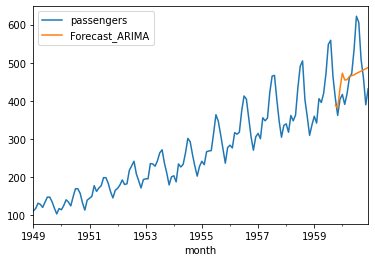

In [479]:
data[['passengers','Forecast_ARIMA']].plot()

In [480]:
data.iloc[129:144,:]

,passengers,1st Diff,Seasonal 1st Diff,2nd Diff,Forecast_ARIMA
month,,,,,
1959-10-01,407,-56.0,48.0,-152.0,389.319550
1959-11-01,362,-45.0,52.0,-101.0,381.801952
1959-12-01,405,43.0,68.0,-2.0,433.015830
1960-01-01,417,12.0,57.0,55.0,472.813730
1960-02-01,391,-26.0,49.0,-14.0,454.989205
1960-03-01,419,28.0,13.0,2.0,455.653471
1960-04-01,461,42.0,65.0,70.0,464.145089
1960-05-01,472,11.0,52.0,53.0,466.322311
1960-06-01,535,63.0,63.0,74.0,468.487323


In [481]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [482]:
model_sarimax = SARIMAX(data['passengers'], order=(2,2,5), seasonal_order=(2,2,5,12))

/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [483]:
result = model_sarimax.fit()

/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.91114D+00    |proj g|=  6.34774D-01


 This problem is unconstrained.



At iterate    5    f=  3.34954D+00    |proj g|=  2.52418D-02

At iterate   10    f=  3.22662D+00    |proj g|=  6.47725D-02

At iterate   15    f=  3.21985D+00    |proj g|=  4.36640D-03

At iterate   20    f=  3.21877D+00    |proj g|=  7.70955D-03

At iterate   25    f=  3.21678D+00    |proj g|=  4.31623D-03

At iterate   30    f=  3.21647D+00    |proj g|=  2.24035D-03

At iterate   35    f=  3.21629D+00    |proj g|=  1.31184D-03

At iterate   40    f=  3.21628D+00    |proj g|=  1.78525D-03

At iterate   45    f=  3.21622D+00    |proj g|=  1.54136D-03


/Users/home/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.21619D+00    |proj g|=  1.38658D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     53      1     0     0   1.387D-03   3.216D+00
  F =   3.2161890565062987     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [484]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 5)x(2, 2, 5, 12)   Log Likelihood                -463.131
Date:                            Tue, 21 Jun 2022   AIC                            956.262
Time:                                    16:31:39   BIC                            997.823
Sample:                                01-01-1949   HQIC                           973.137
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9768      0.765     -1.276      0.202      -2.477       0.523
ar.L2         -0.1088      0.682     -0.160      0.873      -1.445       1.227
ma.L1         -0.4423      1.014     -0.436      0.663      -2.429       1.544
ma.L2         -0.8087      1.076     -0.751      0.452      -2.918       1.301
ma.L3          0.2293      0.597      0.384      0.701      -0.941       1.400
ma.L4         -0.1703      0.433     -0.393      0.694      -1.020       0.679
ma.L5          0.1945      0.221      0.882      0.378      -0.238       0.627
ar.S.L12      -0.5133      3.732     -0.138      0.891      -7.829       6.802
ar.S.L24       0.4218      2.904      0.145      0.885      -5.271       6.114
ma.S.L12      -0.8029      7.751     -0.104      0.917     -15.994      14.388
ma.S.L24      -0.7211      2.577     -0.280      0.780      -5.773       4.331
ma.S.L36       0.6911      6.125      0.113      0.910     -11.313      12.695
ma.S.L48       0.0174      0.564      0.031      0.975      -1.088       1.123
ma.S.L60       0.0820      0.645      0.127      0.899      -1.183       1.347
sigma2        96.6832    455.644      0.212      0.832    -796.363     989.729
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 9.18
Prob(Q):                              0.89   Prob(JB):                         0.01
Heteroskedasticity (H):               2.35   Skew:                             0.21
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [485]:
data['Forecast_SARIMAX'] = result.predict(start=129,end=144, dynamic=True)

<AxesSubplot:xlabel='month'>

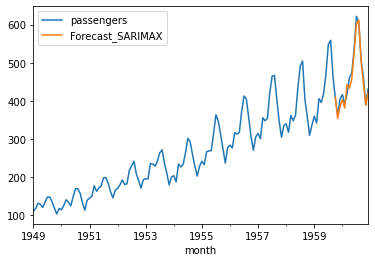

In [486]:
data[['passengers','Forecast_SARIMAX']].plot()

In [487]:
data.iloc[129:144,:]

,passengers,1st Diff,Seasonal 1st Diff,2nd Diff,Forecast_ARIMA,Forecast_SARIMAX
month,,,,,,
1959-10-01,407,-56.0,48.0,-152.0,389.319550,409.617963
1959-11-01,362,-45.0,52.0,-101.0,381.801952,353.932903
1959-12-01,405,43.0,68.0,-2.0,433.015830,385.794832
1960-01-01,417,12.0,57.0,55.0,472.813730,403.543055
1960-02-01,391,-26.0,49.0,-14.0,454.989205,381.341939
1960-03-01,419,28.0,13.0,2.0,455.653471,443.268838
1960-04-01,461,42.0,65.0,70.0,464.145089,433.313970
1960-05-01,472,11.0,52.0,53.0,466.322311,456.327836
1960-06-01,535,63.0,63.0,74.0,468.487323,524.624731


In [488]:
y_test = data['passengers'][129:]

In [489]:
y_pred = data['Forecast_SARIMAX'][129:]

In [490]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error

In [491]:
r2_score(y_test,y_pred)

0.9626575340637326

In [492]:
mean_squared_error(y_test,y_pred)

211.70290368497902

In [493]:
mean_absolute_percentage_error(y_test,y_pred)

0.027261364684199887

In [494]:
# Forecasting

In [495]:
from pandas.tseries.offsets import DateOffset

In [496]:
future_dates = [data.index[-1]+ DateOffset(months=x) for x in range(0,36)]

In [497]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [498]:
new_data = pd.DataFrame(index=future_dates[1:], columns=data.columns)

In [499]:
new_data

,passengers,1st Diff,Seasonal 1st Diff,2nd Diff,Forecast_ARIMA,Forecast_SARIMAX
1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [500]:
fin_data = pd.concat([data,new_data])

In [501]:
fin_data.shape

(179, 6)

In [502]:
fin_data.head()

,passengers,1st Diff,Seasonal 1st Diff,2nd Diff,Forecast_ARIMA,Forecast_SARIMAX
1949-01-01,112,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN,NaN
1949-03-01,132,14.0,NaN,20.0,NaN,NaN
1949-04-01,129,-3.0,NaN,11.0,NaN,NaN
1949-05-01,121,-8.0,NaN,-11.0,NaN,NaN


In [503]:
np.asarray(fin_data)


array([[112, nan, nan, nan, nan, nan],
       [118, 6.0, nan, nan, nan, nan],
       [132, 14.0, nan, 20.0, nan, nan],
       ...,
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan]], dtype=object)

In [505]:
model_sarimax = SARIMAX(fin_data['passengers'], order=(2,2,5), seasonal_order=(2,2,5,12))

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

# result = model_sarimax.fit()

In [ ]:
fin_data['Forecast_SARIMAX'] = result.predict(start=103, end=140,dynamic=True)

In [ ]:
fin_data[['Sales','Forecast_SARIMAX']].plot()